In [294]:
import numpy as np
import plotnine

In [295]:
from plotnine import *

In [296]:
from google.colab import files
uploaded = files.upload()


Saving q3data.csv to q3data (2).csv
Saving q2data.csv to q2data (2).csv
Saving q1data.csv to q1data (2).csv


**Task 1**

Aes being used:

x = income (log10 scale)

y =  life_exp

size = population (bubble area scaled with scale_size_area)

fill = four_regions (region colors)

In [297]:
import pandas as pd

q1 = pd.read_csv("q1data.csv")
q2 = pd.read_csv("q2data.csv")
q3 = pd.read_csv("q3data.csv")

q1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


/usr/local/lib/python3.12/dist-packages/mizani/transforms.py:378: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


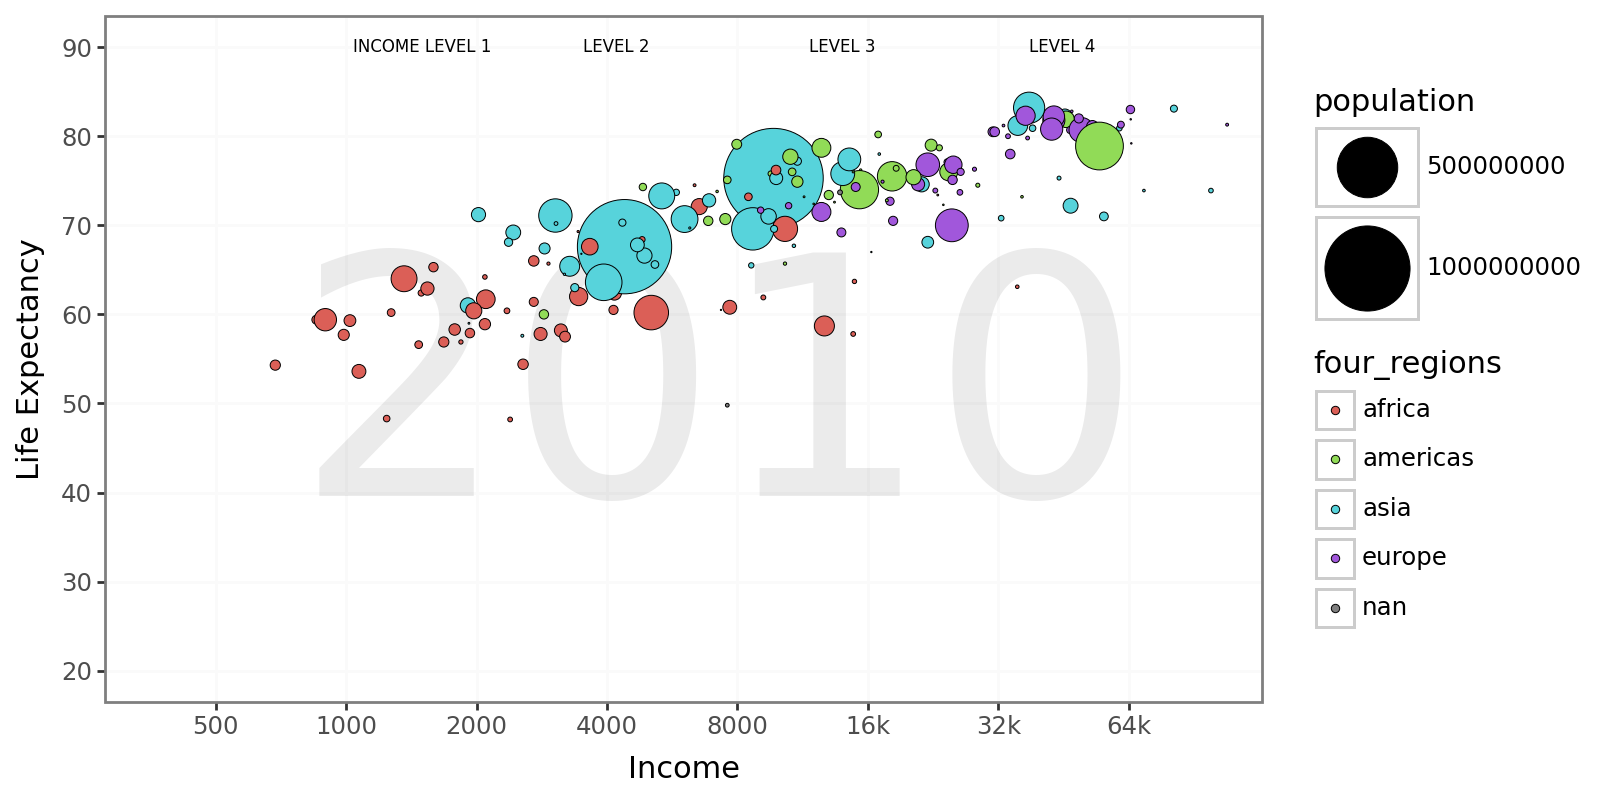

In [298]:
from plotnine import *
import numpy as np

breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]
labels = ["500", "1000", "2000", "4000", "8000", "16k", "32k", "64k"]
year_text = str(q1['year'].iloc[0]) #chatgpt helped with this

(
    ggplot(q1, aes(x="income", y="life_exp", fill="four_regions", size="population"))

    + annotate("text", x=7250, y=50, label=year_text, alpha=.08, size=120)

    + geom_point(color="black", stroke=.2)
    + scale_x_log10(
        breaks=breaks,
        labels=labels,
        limits=(0, 130000)
    )
    + scale_y_continuous(breaks=range(20, 100, 10), limits=(20, 90))
    + scale_size_area(max_size=20)
    + labs(x="Income", y="Life Expectancy")
    + theme_bw()
    + theme(figure_size=(8, 4))
    + theme(panel_grid_major=element_line(color="#FAFAFA"),
        panel_grid_minor=element_blank())


    + annotate("text", x= 1500, y=90, label="INCOME LEVEL 1", size=6, ha="center")
    + annotate("text", x=4200, y=90, label="LEVEL 2", size=6, ha="center")
    + annotate("text", x=14000, y=90, label="LEVEL 3", size=6, ha="center")
    + annotate("text", x=45000, y=90, label="LEVEL 4", size=6, ha="center")

)


Alternative Geometry

**Heat map**

Loses population size info

Loses region categories

Shows counts of countries, not people -> densely populated regions don’t stand out.

Individual countries can’t be identified.

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin_2d : Removed 2 rows containing non-finite values.


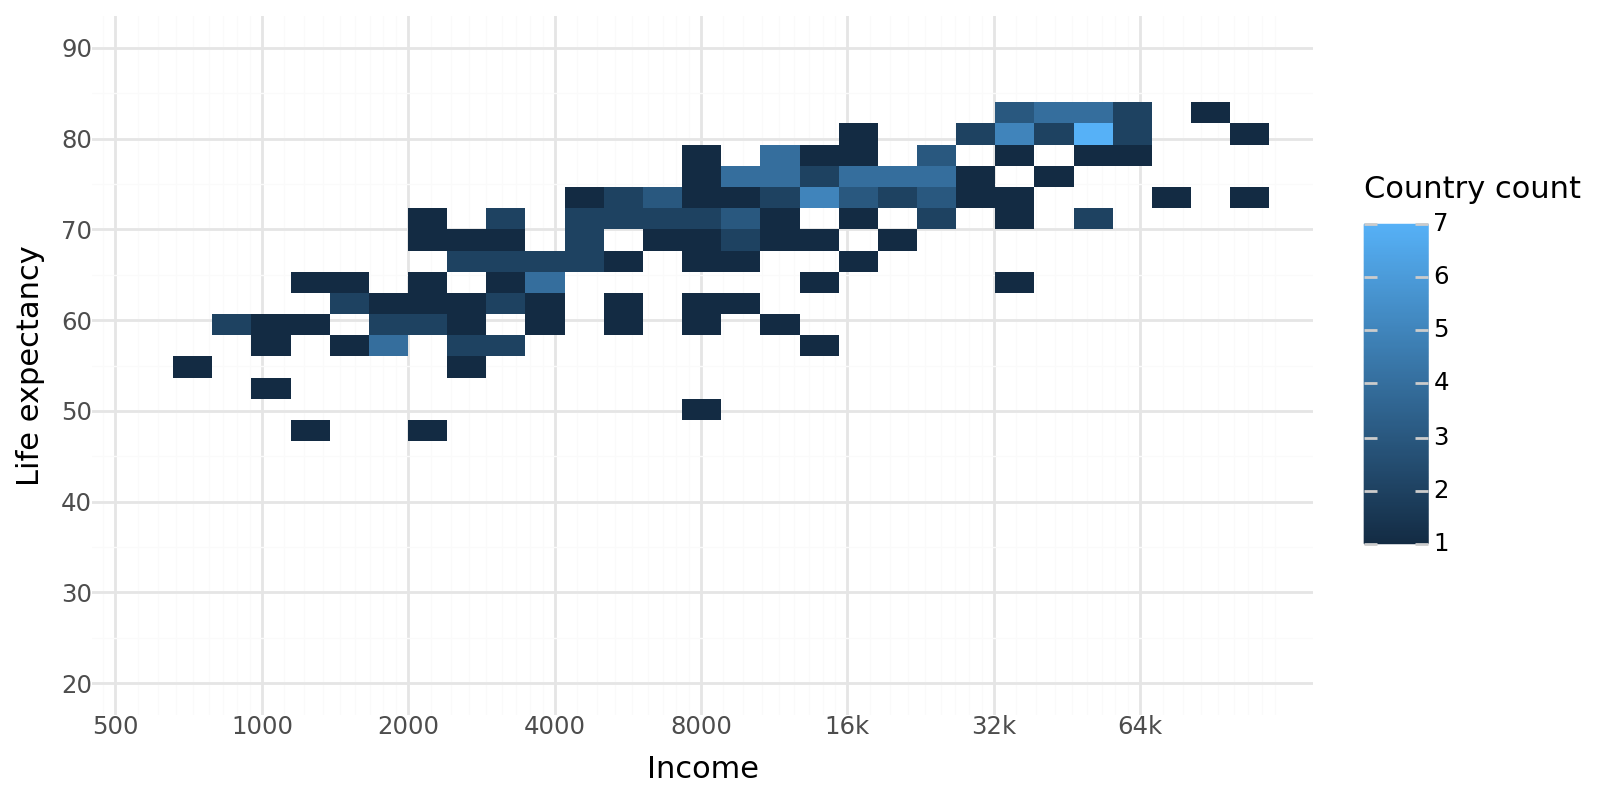

In [299]:
from plotnine import *
import numpy as np

breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]
labels = ["500","1000","2000","4000","8000","16k","32k","64k"]

(
    ggplot(q1, aes(x="income", y="life_exp"))
    + stat_bin_2d(bins=30)  # <- (heatmap of country counts) ChatGPT helped here
    + scale_x_log10(breaks=breaks, labels=labels, limits=(500, 130000), expand=(0.02, 0))
    + scale_y_continuous(breaks=range(20, 100, 10), limits=(20, 90))
    + scale_fill_gradient(name="Country count")
    + labs(x="Income", y="Life expectancy")

    + theme_minimal()
    + theme(figure_size=(8, 4))
)


**Task 2**

Aes being used:

x = exports (%GDP)

y =  imports (%GDP)

size = energy (use)

fill = four_regions (region colors)

In [300]:
q2.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [301]:
q2[["exports","imports","energy"]].dtypes

,0
exports,float64
imports,float64
energy,object


In [302]:
#change energy from object to float

q2["energy"] = pd.to_numeric(q2["energy"], errors='coerce')

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 80 rows containing missing values.


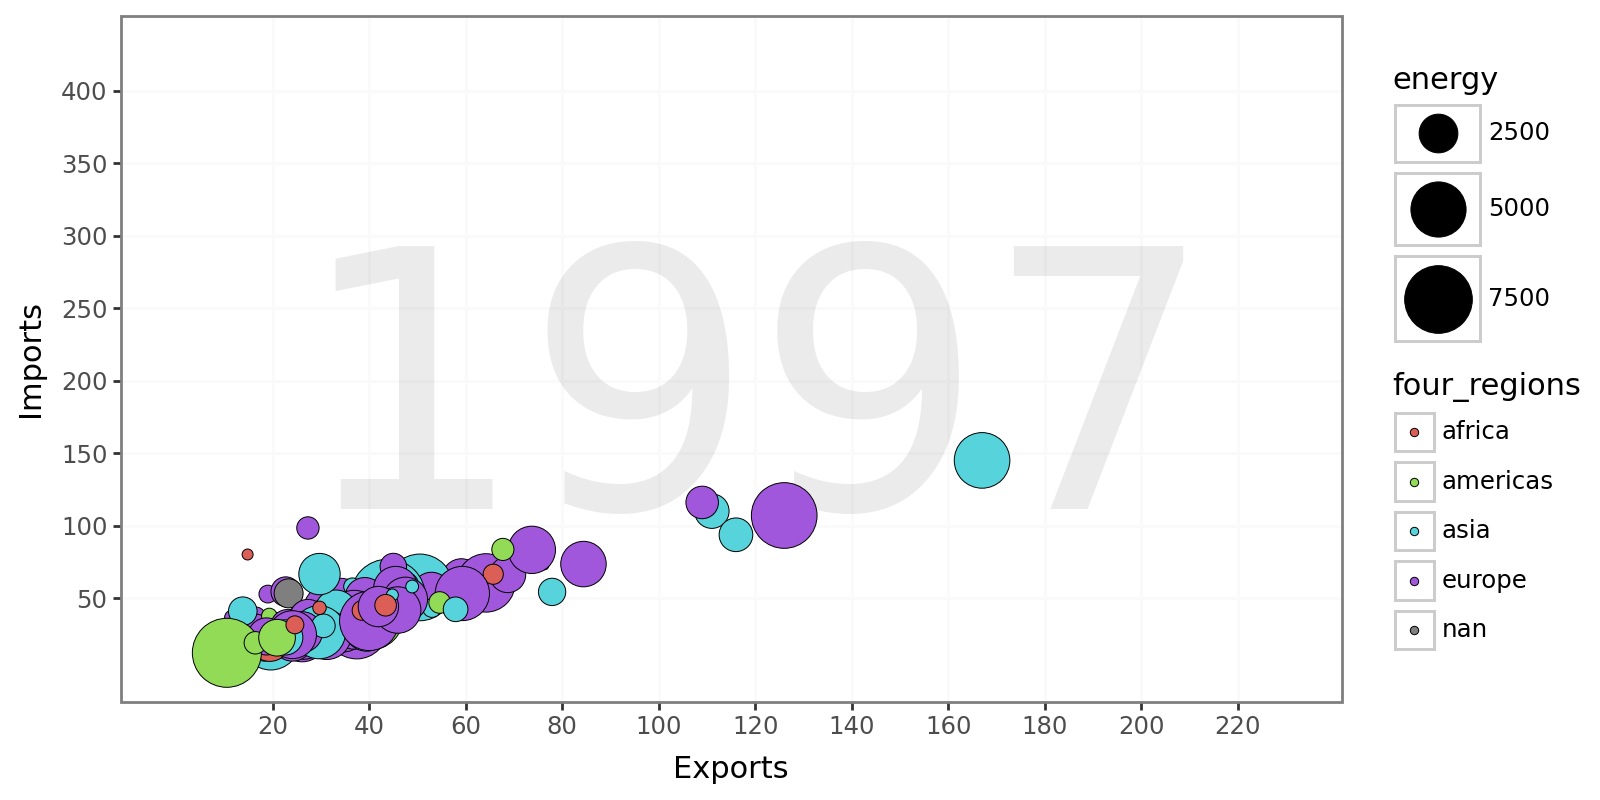

In [303]:
from plotnine import *
import numpy as np


year_text2 = str(q2['year'].iloc[0]) #chatgpt helped with this

(
    ggplot(q2, aes(x="exports", y="imports", fill="four_regions", size="energy"))

    + annotate("text", x=120, y=180, label=year_text2, alpha=.08, size=130)
    + geom_point(color="black", stroke=.2)
    + scale_size_area(max_size=15)
    + labs(x="Exports", y="Imports")
    + scale_x_continuous(breaks=range(20, 240, 20), limits=(0, 230))
    + scale_y_continuous(breaks=range(50, 450, 50), limits=(0, 430))
    + theme_bw()
    + theme(figure_size=(8, 4))
    + theme(panel_grid_major=element_line(color="#FAFAFA"),
        panel_grid_minor=element_blank())


)


Alternative Geometry

**Simple Trend line (geom_smooth)**

Loses color coding for regions

Loses energy sizing coding to understand consumption

Line shows only the center (avg) trend, provides a rough estimation regression equation

Senstive to the outliers, can't observe the extremadies

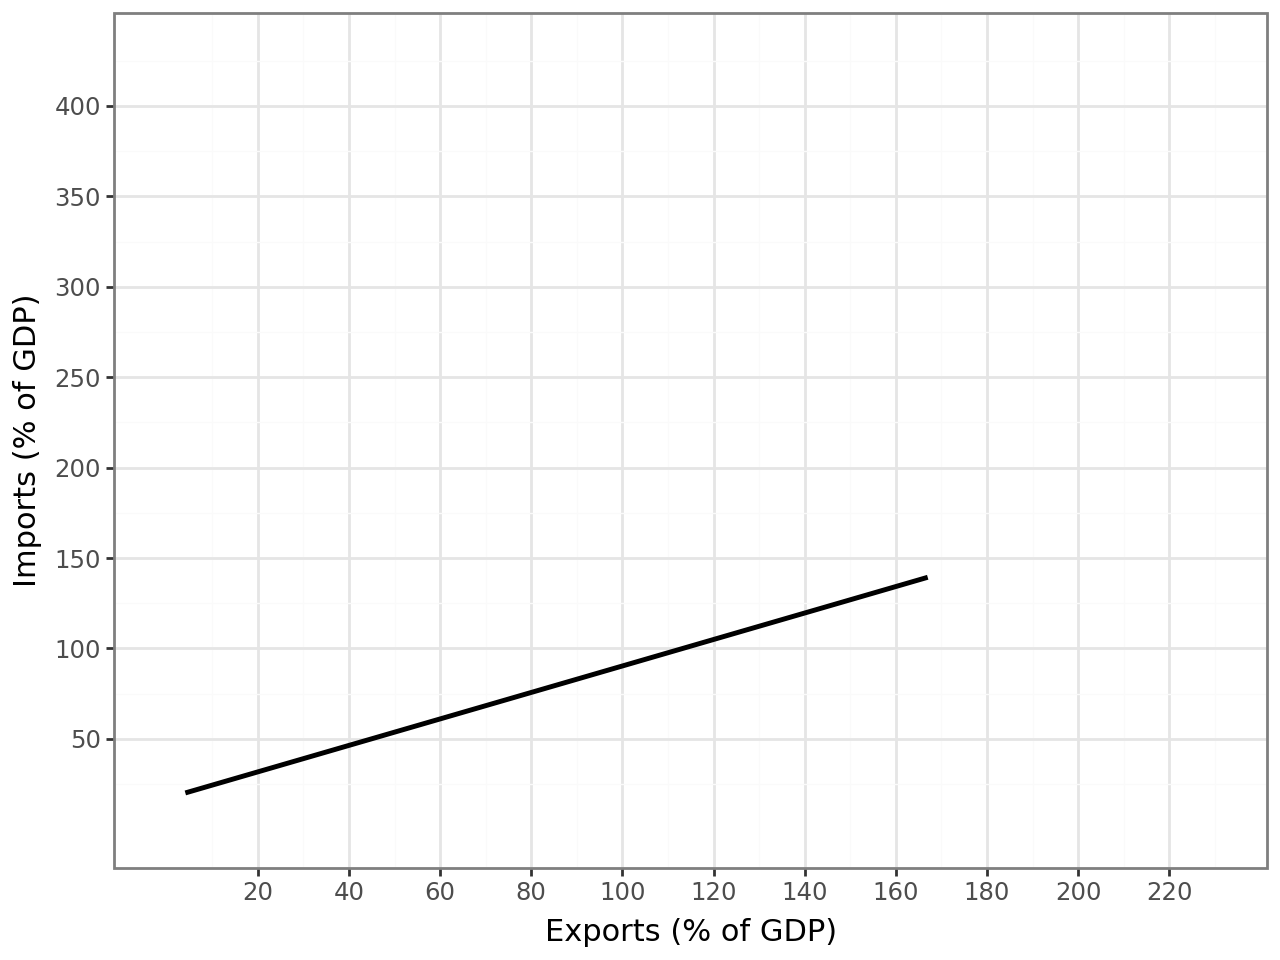

In [304]:

(
    ggplot(q2, aes(x="exports", y="imports"))
    + geom_smooth(method="lm", se=False, color="black")
    + labs(x="Exports (% of GDP)", y="Imports (% of GDP)")
    + scale_x_continuous(breaks=range(20, 240, 20), limits=(0, 230))
    + scale_y_continuous(breaks=range(50, 450, 50), limits=(0, 430))
    + theme_bw()

)


**Task 3**

Aes being used:

x = internet_users

y =  GDP

size = income

fill = four_regions (region colors)

In [305]:
q3.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


/usr/local/lib/python3.12/dist-packages/mizani/transforms.py:378: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


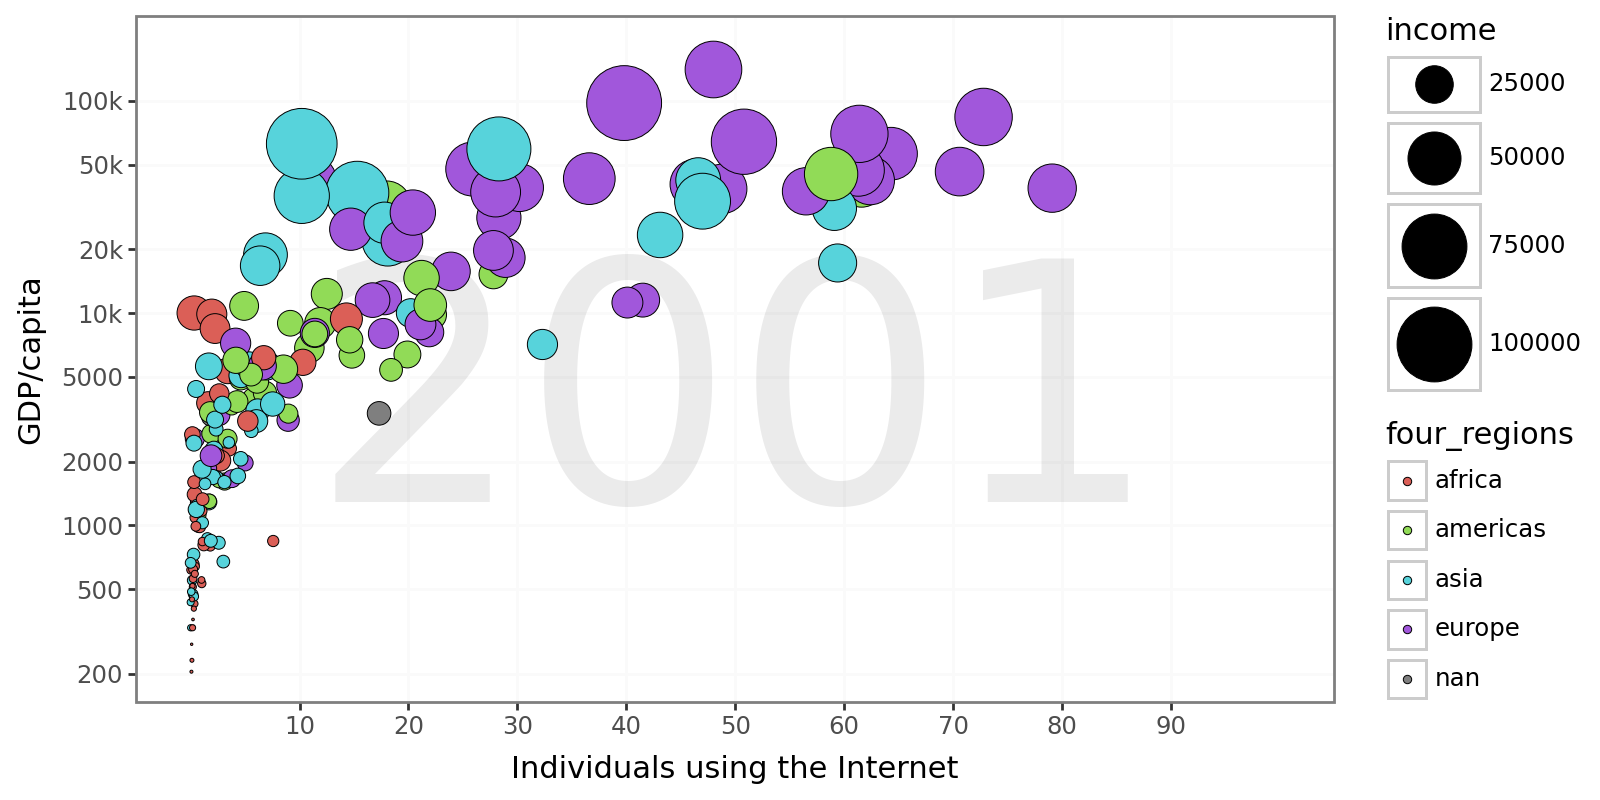

In [310]:
from plotnine import *
import numpy as np

breaks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
labels = ["200", "500", "1000", "2000", "5000", "10k", "20k", "50k", "100k"]
year_text3 = str(q3['year'].iloc[0]) #chatgpt helped with this

(
    ggplot(q3, aes(x="internet_users", y="gdp", fill="four_regions", size="income"))

    + annotate("text", x=50, y=3500, label=year_text3, alpha=.08, size=120)

    + geom_point(color="black", stroke=.2)
    + scale_y_log10(
        breaks=breaks,
        labels=labels,
        limits=(0, 250000)
    )
    + scale_x_continuous(breaks=range(10, 100, 10), limits=(0, 100))
    + scale_size_area(max_size=15)
    + labs(x="Individuals using the Internet", y="GDP/capita")
    + theme_bw()
    + theme(figure_size=(8, 4))
    + theme(panel_grid_major=element_line(color="#FAFAFA"),panel_grid_minor=element_blank())


)


Alternative Geometry

**Geom_Count**

Loses color coding for regions

Loses income info

The count geometry shows a similar graph, but it discludes important information

Doesn't make much sense to use with contionuous data. All points have a count of 1

/usr/local/lib/python3.12/dist-packages/mizani/transforms.py:378: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_sum : Removed 25 rows containing non-finite values.


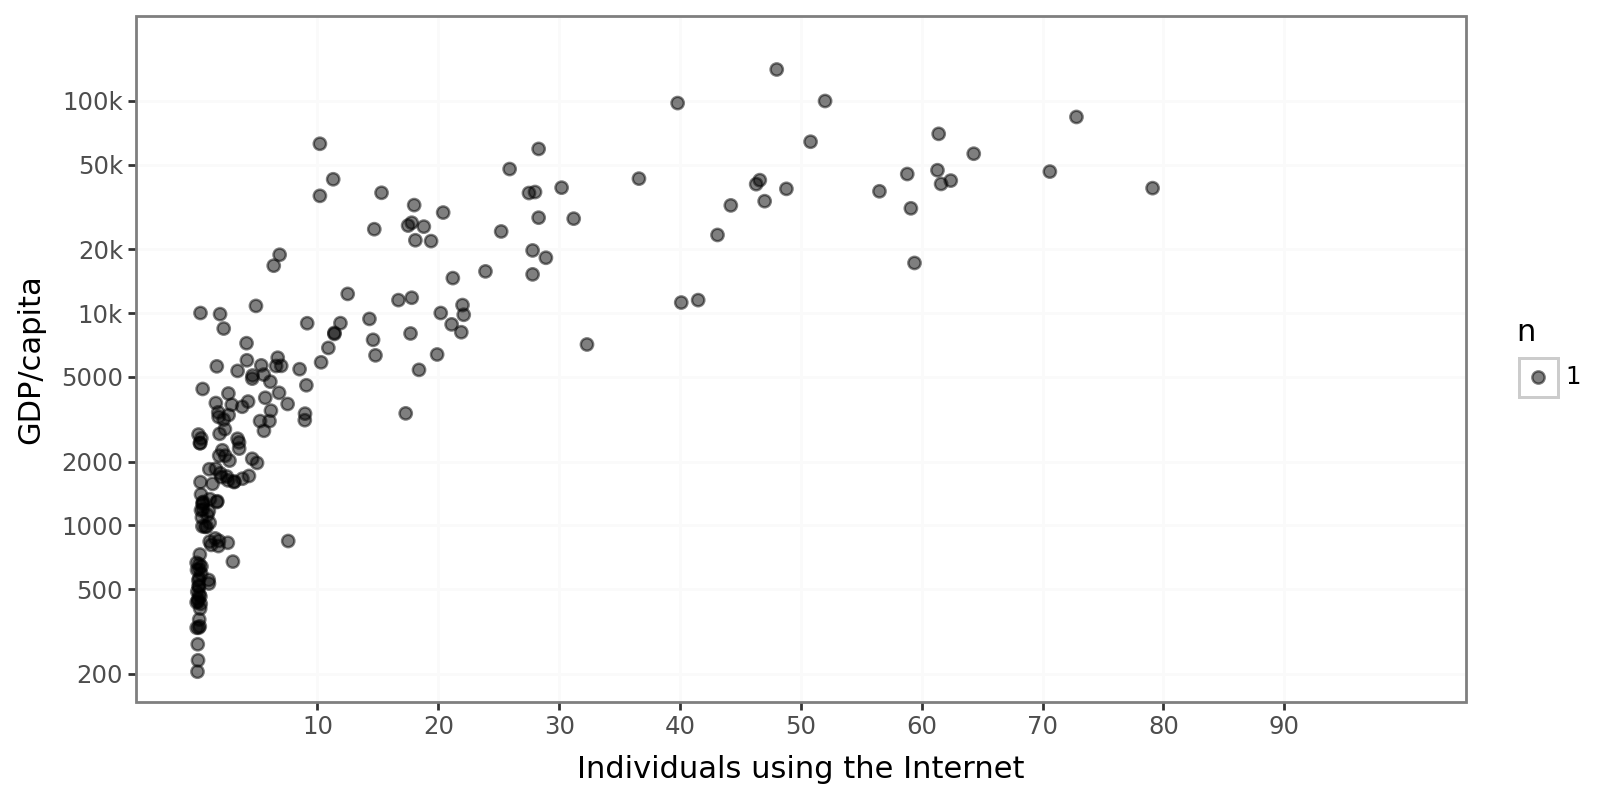

In [334]:

  (
    ggplot(q3, aes(x="internet_users", y="gdp", ))
    + geom_count(alpha=0.5)
    + scale_y_log10(
        breaks=breaks,
        labels=labels,
        limits=(0, 250000)
    )
    + scale_x_continuous(breaks=range(10, 100, 10), limits=(0, 100))
    + scale_size_area(max_size=2)
    + labs(x="Individuals using the Internet", y="GDP/capita")
    + theme_bw()
    + theme(figure_size=(8, 4))
    + theme(panel_grid_major=element_line(color="#FAFAFA"),panel_grid_minor=element_blank())
)